In [1]:
import refine_features as r
import helpers as h
import plot

import numpy as np
import statsmodels.api as sm

In [2]:
print(r.num_features)
print()
print(r.relevant_raw_skills)
print()
print(r.relevant_majors)
print()
print(r.relevant_faculties)

267

['r', 'css', 'php', 'javascript', 'mysql', 'machine learning', 'linux', 'java', 'animal husbandry', 'microsoft office', 'public speaking', 'research', 'university teaching', 'higher education', 'data analysis', 'teaching', 'qualitative research', 'lecturing', 'powerpoint', 'statistics', 'science', 'matlab', 'social media', 'econometrics', 'simulations', 'theory', 'modeling', 'economics', 'sas', 'policy analysis', 'analytical skills', 'analysis', 'latex', 'stata', 'market analysis', 'analytics', 'financial analysis', 'business planning', 'business intelligence', 'business analysis', 'french', 'english', 'segmentation', 'data mining', 'python', 'html', 'program evaluation', 'program development', 'policy', 'public policy', 'report writing', 'big data', 'risk management', 'sql', 'microsoft excel', 'business analytics', 'leadership', 'teamwork', 'customer insight', 'management', 'financial modeling', 'statistical modeling', 'market research', 'data modeling', 'strategy', 'quantitative

In [3]:
#analysis 1: logistic regression

def score_to_bin(score):
    if score <= 4:
        return 1
    if score <= 7:
        return 2
    return 3

def regression(d):
    X = np.array([pair[1] for pair in d])
    y = np.array([pair[0] for pair in d])
    mod = sm.OLS(y,X)
    fii = mod.fit()
    p_values = fii.summary2().tables[1]['P>|t|']
    names_with_p_values = list(zip(r.feature_names, p_values))
    names_with_p_values = sorted(names_with_p_values, key=lambda x: abs(x[1]))
    return names_with_p_values

low_data = [datum for datum in r.num_data if score_to_bin(datum[0]) == 1]
mid_data = [datum for datum in r.num_data if score_to_bin(datum[0]) == 2]
high_data = [datum for datum in r.num_data if score_to_bin(datum[0]) == 3]

low_pairs = regression(low_data)
mid_pairs = regression(mid_data)
high_pairs = regression(high_data)

for pair in low_pairs[0:50]:
    print(pair)
    
h.write_rows_to_csv(low_pairs[0:50], 'graphs/report_graph_6.csv')
    
print()

for pair in mid_pairs[0:50]:
    print(pair)
    
h.write_rows_to_csv(mid_pairs[0:50], 'graphs/report_graph_7.csv')
    
print()

for pair in high_pairs[0:50]:
    print(pair)
    
h.write_rows_to_csv(high_pairs[0:50], 'graphs/report_graph_8.csv')

('edu', 2.1147239476095846e-76)
('research', 4.2619847898563555e-36)
('exps', 6.630665951864578e-35)
('data analysis', 7.756550235969943e-26)
('physical sciences', 1.2916379284102478e-13)
('mathematics', 2.0387736017508324e-10)
('event planning', 2.9293485201355545e-10)
('sustainability', 2.9440912988212363e-10)
('veterinary medicine', 7.841666063059851e-10)
('agriculture', 8.904232825974742e-10)
('microsoft office', 9.472398250052494e-10)
('editing', 1.0862364559522776e-09)
('pat', 1.4978957876004721e-09)
('maritime', 3.361392043421477e-09)
('matlab', 1.757410753394074e-08)
('stata', 7.758430385976642e-08)
('linux', 8.060770949605493e-08)
('project planning', 1.8976130994945327e-07)
('molecular biology', 5.722605043122275e-07)
('university teaching', 6.338653108969267e-07)
('pcr', 8.321326458303302e-07)
('business intelligence', 1.1297677511726748e-06)
('grant writing', 1.4258274827372083e-06)
('science', 2.933000413393615e-06)
('public health', 2.9796767984513783e-06)
('html', 3.6794

C:\Users\fgval\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\fgval\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\fgval\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\fgval\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [4]:
#analysis 2: average entropy reduction
def count_appearances(feature_index, val, score):
    count = 0
    for s, feats in r.num_data:
        if s == score and feats[feature_index] == val:
            count += 1
    return count


just_scores = [score for score, features in r.data]
score_histogram = h.histogram(just_scores)
frequencies = score_histogram.values()
normalized_freqs = [freq/sum(frequencies) for freq in frequencies]
initial_entropy = h.entropy(normalized_freqs)

avg_entropy_for_feature = []
possible_distributions_by_feature = []
for feature_index in range(r.num_features):
    entropies = []
    freqs = []
    distributions = []
    for val in r.possible_vals[feature_index]:
        distribution = []
        for score in range(1, 11):
            distribution += [count_appearances(feature_index, val, score)]
        total = sum(distribution)
        if total > 0:
            distribution = [freq/total for freq in distribution]
            entropies += [h.entropy(distribution)]
            freqs += [total]
        else:
            distribution = 'n/a'
        distributions += [distribution]
    avg_entropy_for_feature += [h.weighted_avg(entropies, freqs)]
    possible_distributions_by_feature += [distributions]

avg_entropy_reduction_per_feature = [initial_entropy - avg_entropy_for_feature[i] for i in range(r.num_features)]
zipped_entropies = list(zip(r.feature_names, avg_entropy_reduction_per_feature))
zipped_entropies = sorted(zipped_entropies, key=lambda x: -x[1])

print()
print('most entropy-reducing features')
for pair in zipped_entropies[0:30]:
    print(pair)
    
h.write_rows_to_csv(zipped_entropies[0:30], 'graphs/report_graph_9.csv')


most entropy-reducing features
('edu', 0.33020743372649664)
('exps', 0.21068363589367145)
('physical sciences', 0.09378963676905006)
('pub', 0.07817690957371726)
('engineering', 0.07659977211877766)
('engineering', 0.06681690527593753)
('social sciences', 0.06589709743525596)
('cert', 0.058665281735831964)
('philosophy', 0.05690358232143522)
('statistics', 0.04980359758026731)
('physics', 0.04810343024970232)
('economics', 0.047060224299749986)
('t100', 0.04177259832622271)
('humanities', 0.04163381574434499)
('matlab', 0.039958816671753716)
('data analysis', 0.037897136937280695)
('statistics', 0.036986998930811144)
('data mining', 0.034992531816062655)
('social science', 0.033025959163780705)
('python', 0.03257161768883643)
('latex', 0.032122606926034525)
('simulations', 0.030903136809457887)
('physics', 0.030074751672410027)
('mathematical modeling', 0.030062161309819313)
('research', 0.029439123166239867)
('mathematics', 0.029028146005573685)
('numerical analysis', 0.0279332407891

In [5]:
#analysis 3: table of feature prominence by score
table = []
for score in range(1, 11):
    column = []
    for feature_index in range(r.num_features):
        if feature_index != 2 and feature_index != 3:
            for value_index, val in enumerate(r.possible_vals[feature_index]):
                if possible_distributions_by_feature[feature_index][value_index] != 'n/a':
                    posterior_prob = possible_distributions_by_feature[feature_index][value_index][score - 1]
                    entry = (r.feature_names[feature_index], val, posterior_prob)
                    column += [entry]
    column = sorted(column, key=lambda x: -x[2])
    table += [column]

def print_col(col, max_entries):
    printed = 0
    for i, entry in enumerate(col):
        if printed < max_entries and entry[1] != 0:
            printed += 1
            print('\t' + entry[0] + '=' + str(entry[1]) + '; prob: ' + str(entry[2]))

def entry_to_pair(entry):
    if entry[0] == 'edu':
        return [entry[0] + '=' + str(entry[1]), entry[2]]
    else:
        return [entry[0], entry[2]]
      
def make_rows(table, max_entries):
    filtered_table = [[entry for entry in column if entry[1] != 0] for column in table]
    rows = []
    for i in range(max_entries):
        rows += [[entry_to_pair(col[i]) for col in filtered_table]]
    rows = [h.flatten_once(row) for row in rows]
    return rows

# print()
# print('table of highest posterior distributions by score')
# for i, column in enumerate(table):
#     score = i + 1
#     print('Score = ' + str(score))
#     print_col(column, 10)
#     print()

rows = make_rows(table, 10)

for row in rows:
    print(row)

h.write_rows_to_csv(rows, 'graphs/report_graph_1.csv')


['inglés', 0.36082474226804123, 'offshore drilling', 0.5773195876288659, 'primary research', 0.5647058823529412, 'information systems', 0.5116279069767442, 'geography', 0.25, 'investments', 0.3017241379310345, 'data modeling', 0.23170731707317074, 'chemistry', 0.2336448598130841, 'electrical engineering', 0.18604651162790697, 'artificial intelligence', 0.46875]
['agribusiness', 0.35668789808917195, 'petroleum', 0.550561797752809, 'focus groups', 0.5465116279069767, 'planning', 0.5, 'information systems', 0.23255813953488372, 'valuation', 0.29896907216494845, 'international relations', 0.1743119266055046, 'physics', 0.18773946360153257, 'mentoring', 0.1744186046511628, 'industrial engineering', 0.39705882352941174]
['investigación y desarrollo', 0.32967032967032966, 'surgery', 0.5408163265306123, 'zoology', 0.5211267605633803, 'edu=2', 0.43243243243243246, 'agriculture', 0.22950819672131148, 'portfolio management', 0.2891566265060241, 'macroeconomics', 0.171875, 'data modeling', 0.18292

In [6]:
#analysis 4: correlation between independent variables

ind_variables = [pair[1] for pair in r.num_data]
ind_variables_numpy = np.array(ind_variables)
np.swapaxes(ind_variables_numpy,0,1)
corr_matrix = np.corrcoef(ind_variables)
corr_matrix = list(corr_matrix)
pair_corrs = []
for i in range(r.num_features):
    for j in range(i + 1, r.num_features):
        pair_corrs += [[r.feature_names[i], r.feature_names[j], corr_matrix[i][j]]]
pair_corrs = sorted(pair_corrs, key=lambda x: -x[2])
for pair in pair_corrs[0:50]:
    print(pair)

h.write_rows_to_csv(pair_corrs[0:50], 'graphs/report_graph_10.csv')

['t100', 'elite', 0.997236114154766]
['edu', 't100', 0.9948968951815269]
['exps', 'edu', 0.9899932768502171]
['edu', 'elite', 0.9846507227852365]
['cert', 'exps', 0.979701033804464]
['edu', 'r', 0.9732382391642294]
['exps', 't100', 0.9707032298513417]
['edu', 'css', 0.9621793537691854]
['pat', 'cert', 0.961009635175606]
['edu', 'php', 0.9519998795521287]
['exps', 'elite', 0.9501679731243027]
['edu', 'javascript', 0.9428244347597073]
['cert', 'edu', 0.9416090284759362]
['pub', 'pat', 0.9409871866592409]
['exps', 'r', 0.9310714116136413]
['exps', 'css', 0.9141091271187138]
['cert', 't100', 0.9028311089775141]
['exps', 'php', 0.8992785474171845]
['exps', 'javascript', 0.886357817925411]
['cert', 'elite', 0.8683881675485]
['cert', 'r', 0.8390348800594135]
['edu', 'psychology', 0.8180827313204735]
['cert', 'css', 0.8142717992471593]
['pub', 'cert', 0.8107134506154989]
['cert', 'php', 0.7933458294283128]
['cert', 'javascript', 0.7755505815686649]
['edu', 'cell biology', 0.7264106821563612]
[

C:\Users\fgval\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\fgval\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [7]:
#analysis 5: histogram of scores

num_data_bins = [[score_to_bin(pair[0]), pair[1]] for pair in r.num_data]

def histogram_of_scores(scores, bins):
    hist_lst = [0 for _ in range(bins)]
    for score in scores:
        hist_lst[score - 1] += 1
    return hist_lst

def histogram_of_degrees(scores, bins):
    hist_lst = [0 for _ in range(bins)]
    for score in scores:
        hist_lst[score] += 1
    return hist_lst


part1a_hist = histogram_of_scores([score for score, features in r.num_data], 10)
part1b_hist = histogram_of_scores([score for score, features in num_data_bins], 3)
print(part1a_hist)
print(part1b_hist)



[702, 1081, 1293, 929, 293, 465, 335, 308, 180, 382]
[4005, 1093, 870]


In [8]:
#analysis 6: education histograms

part2a_hists = []
for degree in range(0,8):
    part2a_hists += [histogram_of_scores([score for score, features in r.num_data if features[4] == degree], 10)]

part2b_hists = []
for score in range(1,11):
    part2b_hists += [histogram_of_degrees([features[4] for s, features in r.num_data if s == score], 8)]

part2c_hists = []
for bin_num in range(1,4):
    part2c_hists += [histogram_of_degrees([features[4] for b, features in num_data_bins if b == bin_num], 8)]

print(part2a_hists)
print()
print(part2b_hists)
print()
print(part2c_hists)
        

[[440, 654, 432, 165, 43, 39, 39, 16, 10, 12], [57, 55, 77, 18, 9, 5, 4, 2, 0, 0], [3, 7, 7, 16, 3, 1, 0, 0, 0, 0], [3, 26, 28, 13, 9, 0, 0, 0, 0, 0], [139, 260, 586, 485, 132, 181, 105, 82, 46, 83], [48, 46, 109, 174, 76, 170, 133, 127, 66, 99], [2, 10, 23, 14, 6, 13, 6, 13, 3, 6], [10, 23, 31, 44, 15, 56, 48, 68, 55, 182]]

[[440, 57, 3, 3, 139, 48, 2, 10], [654, 55, 7, 26, 260, 46, 10, 23], [432, 77, 7, 28, 586, 109, 23, 31], [165, 18, 16, 13, 485, 174, 14, 44], [43, 9, 3, 9, 132, 76, 6, 15], [39, 5, 1, 0, 181, 170, 13, 56], [39, 4, 0, 0, 105, 133, 6, 48], [16, 2, 0, 0, 82, 127, 13, 68], [10, 0, 0, 0, 46, 66, 3, 55], [12, 0, 0, 0, 83, 99, 6, 182]]

[[1691, 207, 33, 70, 1470, 377, 49, 108], [121, 18, 4, 9, 418, 379, 25, 119], [38, 2, 0, 0, 211, 292, 22, 305]]


In [9]:
#analysis 7: patent/publication histograms

publication_scores = [score for score, features in r.num_data if features[0] == 1]
publication_bins = [score for score, features in num_data_bins if features[0] == 1]
patent_scores = [score for score, features in r.num_data if features[1] == 1]
patent_bins = [score for score, features in num_data_bins if features[1] == 1]
elite_scores = [score for score, features in r.num_data if features[6] == 1]
elite_bins = [score for score, features in num_data_bins if features[6] == 1]

part3a_hist = histogram_of_scores(publication_scores, 10)
part3b_hist = histogram_of_scores(patent_scores, 10)
part3c_hist = histogram_of_scores(elite_scores, 10)
part3d_hist = histogram_of_scores(publication_bins, 3)
part3e_hist = histogram_of_scores(patent_bins, 3)
part3f_hist = histogram_of_scores(elite_bins, 3)


print(part3a_hist)
print()
print(part3b_hist)
print()
print(part3c_hist)
print()
print(part3d_hist)
print()
print(part3e_hist)
print()
print(part3f_hist)

[39, 69, 108, 143, 106, 37, 80, 122, 63, 171]

[0, 1, 13, 7, 4, 6, 1, 9, 5, 29]

[13, 8, 23, 44, 14, 22, 24, 27, 26, 49]

[359, 223, 356]

[21, 11, 43]

[88, 60, 102]


In [10]:
#analysis 8: major posteriors

part4a_table = []

for column in table:
    part4a_table += [[entry for entry in column if entry[0] in r.relevant_majors]]
    
part4b_table = []

part4b_table += [sorted(part4a_table[0] + part4a_table[1] + part4a_table[2] + part4a_table[3], key=lambda x:-x[2])]
part4b_table += [sorted(part4a_table[4] + part4a_table[5] + part4a_table[6], key=lambda x:-x[2])]
part4b_table += [sorted(part4a_table[7] + part4a_table[8] + part4a_table[9], key=lambda x:-x[2])]



print()
# for i, column in enumerate(part4a_table):
#     score = i + 1
#     print('Score = ' + str(score))
#     print_col(column, 10)
#     print()
    
for row in make_rows(part4a_table, 10):
    print(row)
    
h.write_rows_to_csv(make_rows(part4a_table, 10), 'graphs/report_graph_2.csv')
    
print()
# for i, column in enumerate(part4b_table):
#     score = i + 1
#     print('Bin = ' + str(score))
#     print_col(column, 10)
#     print()
    
for row in make_rows(part4b_table, 10):
    print(row)
    
h.write_rows_to_csv(make_rows(part4b_table, 10), 'graphs/report_graph_3.csv')


['agriculture', 0.2948207171314741, 'veterinary medicine', 0.44594594594594594, 'zoology', 0.5211267605633803, 'information systems', 0.5116279069767442, 'geography', 0.25, 'accounting', 0.25688073394495414, 'accounting', 0.15625, 'chemistry', 0.2336448598130841, 'electrical engineering', 0.18604651162790697, 'industrial engineering', 0.39705882352941174]
['psychology', 0.2048780487804878, 'veterinary medicine', 0.345679012345679, 'political science', 0.42168674698795183, 'planning', 0.5, 'information systems', 0.23255813953488372, 'finance', 0.2186046511627907, 'finance', 0.14418604651162792, 'physics', 0.18773946360153257, 'accounting', 0.13761467889908258, 'computer science', 0.3391304347826087]
['mathematics', 0.20207253886010362, 'agriculture', 0.2908366533864542, 'design', 0.34285714285714286, 'veterinary medicine', 0.35802469135802467, 'agriculture', 0.22950819672131148, 'industrial engineering', 0.19117647058823528, 'accounting', 0.13761467889908258, 'mathematics', 0.168831168

In [20]:
#analysis 9: skill posteriors

part5a_table = []

for column in table:
    part5a_table += [[entry for entry in column if entry[0] in r.relevant_raw_skills]]
    
part5b_table = []

part5b_table += [sorted(part5a_table[0] + part5a_table[1] + part5a_table[2] + part5a_table[3], key=lambda x:-x[2])]
part5b_table += [sorted(part5a_table[4] + part5a_table[5] + part5a_table[6], key=lambda x:-x[2])]
part5b_table += [sorted(part5a_table[7] + part5a_table[8] + part5a_table[9], key=lambda x:-x[2])]

print()
# for i, column in enumerate(part5a_table):
#     score = i + 1
#     print('Score = ' + str(score))
#     print_col(column, 20)
#     print()
for row in make_rows(part5a_table, 20):
    print(row)
    
h.write_rows_to_csv(make_rows(part5a_table, 20), 'graphs/report_graph_4.csv')
    
print()
# for i, column in enumerate(part5b_table):
#     score = i + 1
#     print('Bin = ' + str(score))
#     print_col(column, 20)
#     print()
for row in make_rows(part5b_table, 20):
    print(row)
    
h.write_rows_to_csv(make_rows(part5b_table, 20), 'graphs/report_graph_5.csv')


['inglés', 0.36082474226804123, 'offshore drilling', 0.5773195876288659, 'primary research', 0.5647058823529412, 'pharmaceutical industry', 0.43157894736842106, 'agriculture', 0.22950819672131148, 'investments', 0.3017241379310345, 'data modeling', 0.23170731707317074, 'physics', 0.18773946360153257, 'mentoring', 0.1744186046511628, 'artificial intelligence', 0.46875]
['agribusiness', 0.35668789808917195, 'petroleum', 0.550561797752809, 'focus groups', 0.5465116279069767, 'veterinary medicine', 0.35802469135802467, 'laboratory', 0.2, 'valuation', 0.29896907216494845, 'international relations', 0.1743119266055046, 'data modeling', 0.18292682926829268, 'artificial intelligence', 0.15625, 'numerical analysis', 0.35911602209944754]
['investigación y desarrollo', 0.32967032967032966, 'surgery', 0.5408163265306123, 'customer insight', 0.4881889763779528, 'marketing', 0.3211009174311927, 'r&d', 0.17094017094017094, 'portfolio management', 0.2891566265060241, 'macroeconomics', 0.171875, 'bios

In [12]:
print(part1a_hist)
print(part1b_hist)
print(part3a_hist)
print(part3b_hist)
print(part3c_hist)
print(part3d_hist)
print(part3e_hist)
print(part3f_hist)
print(part2a_hists)
print(part2b_hists)
print(part2c_hists)

[702, 1081, 1293, 929, 293, 465, 335, 308, 180, 382]
[4005, 1093, 870]
[39, 69, 108, 143, 106, 37, 80, 122, 63, 171]
[0, 1, 13, 7, 4, 6, 1, 9, 5, 29]
[13, 8, 23, 44, 14, 22, 24, 27, 26, 49]
[359, 223, 356]
[21, 11, 43]
[88, 60, 102]
[[440, 654, 432, 165, 43, 39, 39, 16, 10, 12], [57, 55, 77, 18, 9, 5, 4, 2, 0, 0], [3, 7, 7, 16, 3, 1, 0, 0, 0, 0], [3, 26, 28, 13, 9, 0, 0, 0, 0, 0], [139, 260, 586, 485, 132, 181, 105, 82, 46, 83], [48, 46, 109, 174, 76, 170, 133, 127, 66, 99], [2, 10, 23, 14, 6, 13, 6, 13, 3, 6], [10, 23, 31, 44, 15, 56, 48, 68, 55, 182]]
[[440, 57, 3, 3, 139, 48, 2, 10], [654, 55, 7, 26, 260, 46, 10, 23], [432, 77, 7, 28, 586, 109, 23, 31], [165, 18, 16, 13, 485, 174, 14, 44], [43, 9, 3, 9, 132, 76, 6, 15], [39, 5, 1, 0, 181, 170, 13, 56], [39, 4, 0, 0, 105, 133, 6, 48], [16, 2, 0, 0, 82, 127, 13, 68], [10, 0, 0, 0, 46, 66, 3, 55], [12, 0, 0, 0, 83, 99, 6, 182]]
[[1691, 207, 33, 70, 1470, 377, 49, 108], [121, 18, 4, 9, 418, 379, 25, 119], [38, 2, 0, 0, 211, 292, 22, 305

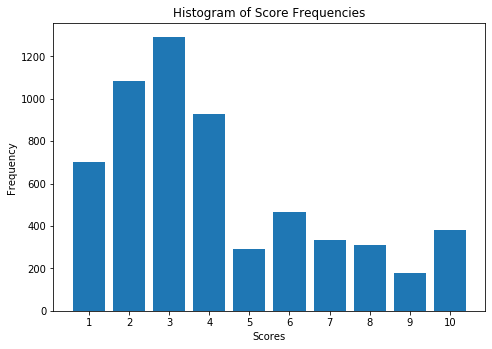

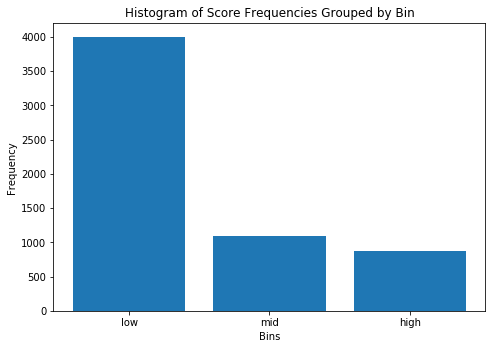

In [13]:
plot.bar_graph(part1a_hist, range(1,11), range(1,11), 'Scores', 'Frequency','Histogram of Score Frequencies')
plot.bar_graph(part1b_hist,['low', 'mid', 'high'], range(0,3), 'Bins', 'Frequency', 'Histogram of Score Frequencies Grouped by Bin')


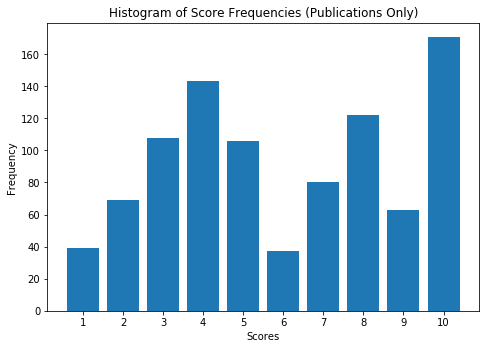

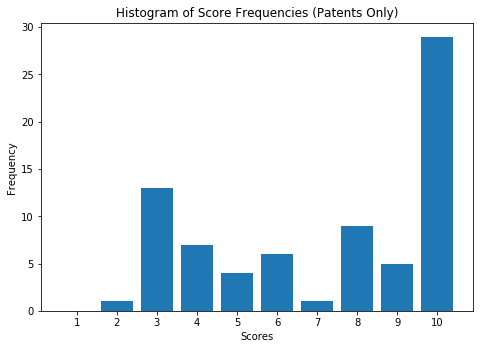

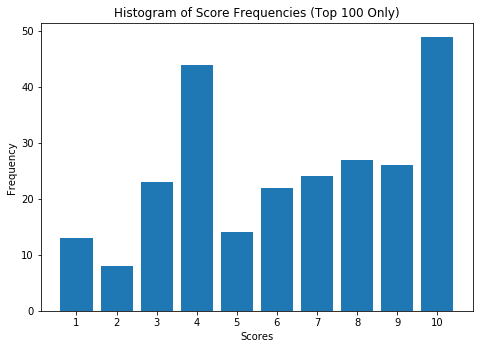

In [14]:
plot.bar_graph(part3a_hist, range(1,11), range(1,11), 'Scores', 'Frequency','Histogram of Score Frequencies (Publications Only)')
plot.bar_graph(part3b_hist, range(1,11), range(1,11), 'Scores', 'Frequency','Histogram of Score Frequencies (Patents Only)')
plot.bar_graph(part3c_hist, range(1,11), range(1,11), 'Scores', 'Frequency','Histogram of Score Frequencies (Top 100 Only)')

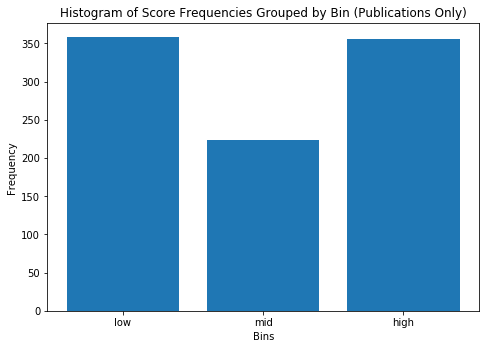

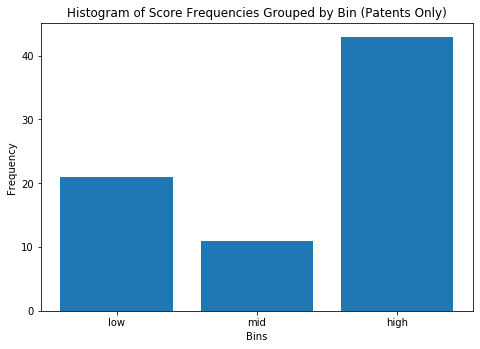

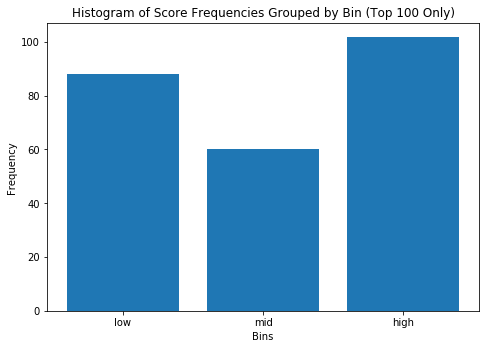

In [15]:
plot.bar_graph(part3d_hist,['low', 'mid', 'high'], range(0,3), 'Bins', 'Frequency', 'Histogram of Score Frequencies Grouped by Bin (Publications Only)')
plot.bar_graph(part3e_hist,['low', 'mid', 'high'], range(0,3), 'Bins', 'Frequency', 'Histogram of Score Frequencies Grouped by Bin (Patents Only)')
plot.bar_graph(part3f_hist,['low', 'mid', 'high'], range(0,3), 'Bins', 'Frequency', 'Histogram of Score Frequencies Grouped by Bin (Top 100 Only)')


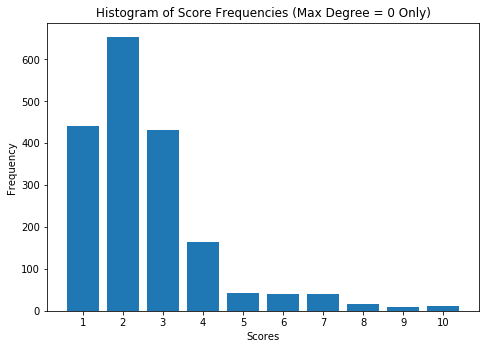

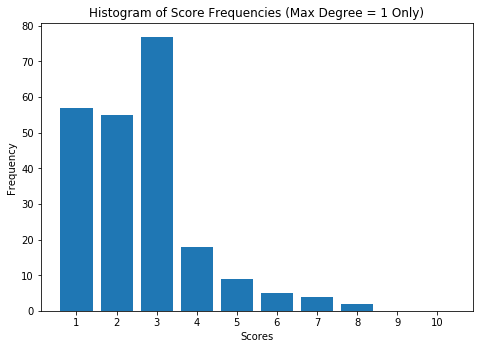

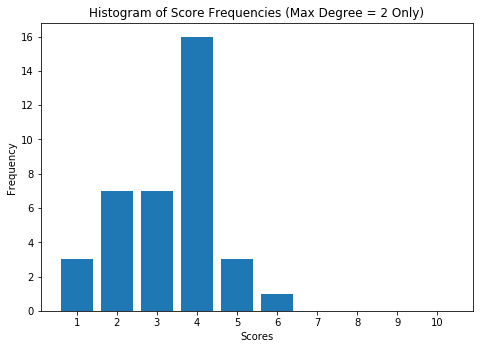

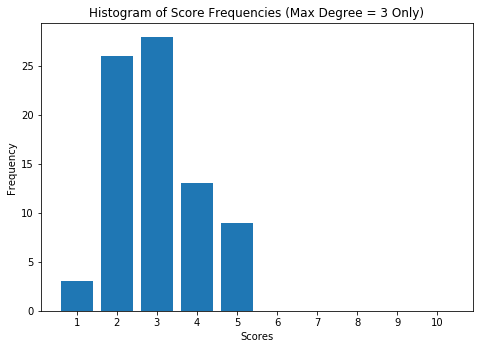

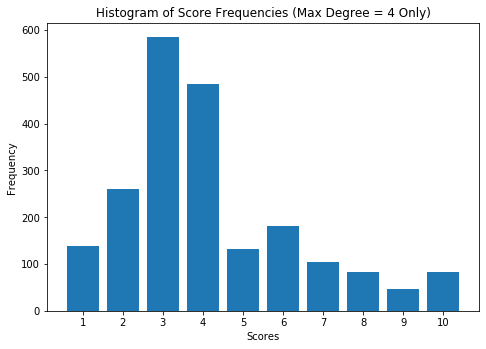

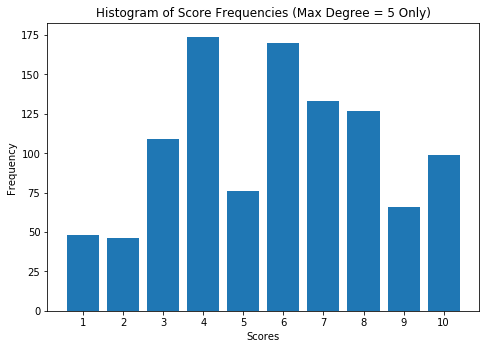

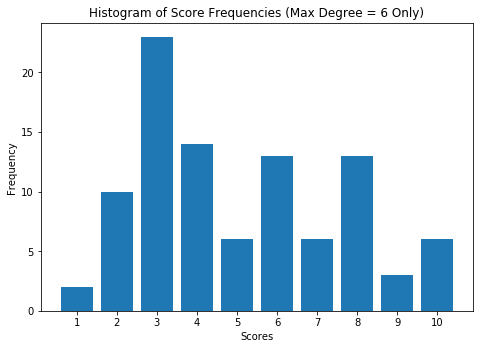

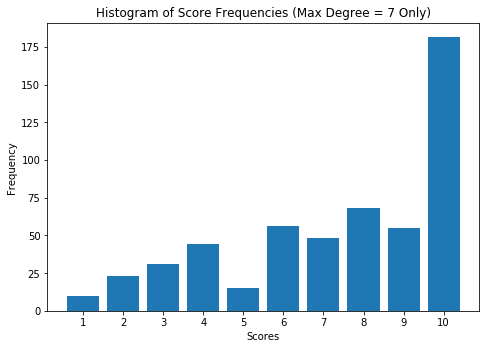

In [16]:
for i, hist in enumerate(part2a_hists):
    plot.bar_graph(hist, range(1,11), range(1,11), 'Scores', 'Frequency','Histogram of Score Frequencies (Max Degree = ' + str(i) + ' Only)')

# i = 7
# hist = part2a_hists[i]
# plot.bar_graph(hist, range(1,11), range(1,11), 'Scores', 'Frequency','Histogram of Score Frequencies (Max Degree = ' + str(i) + ' Only)')

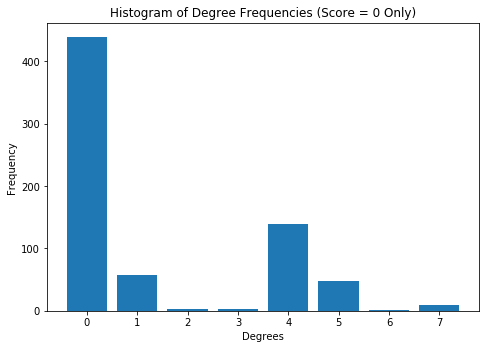

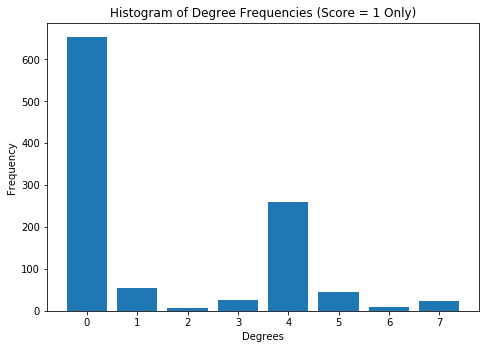

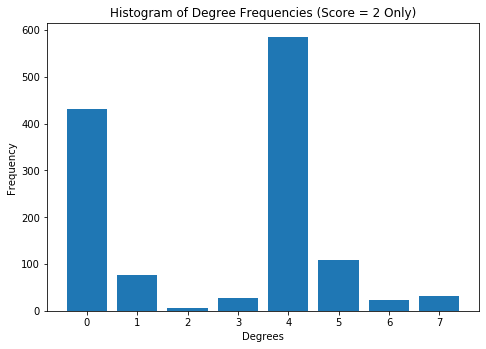

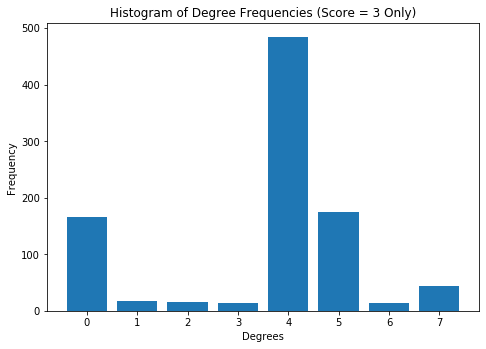

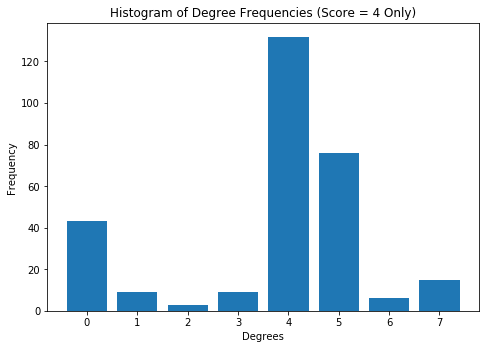

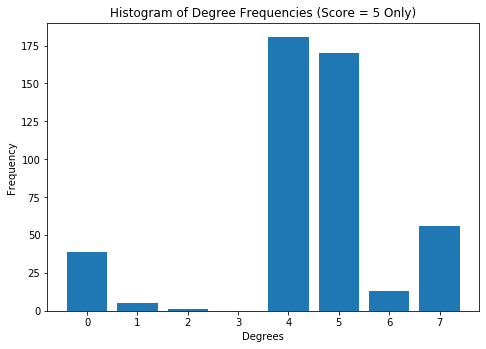

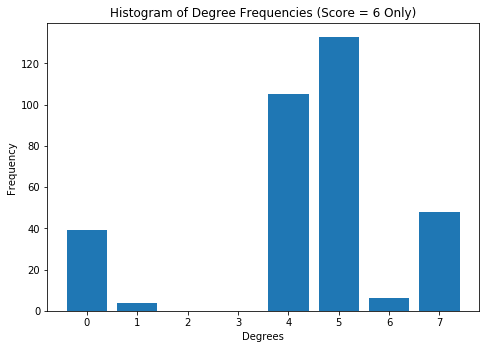

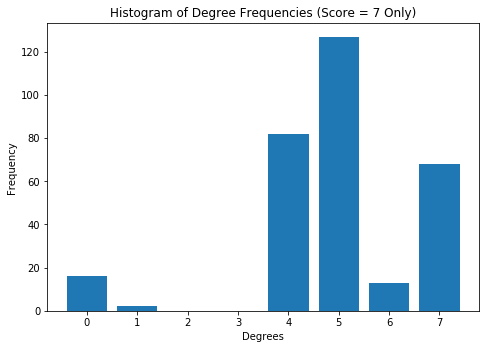

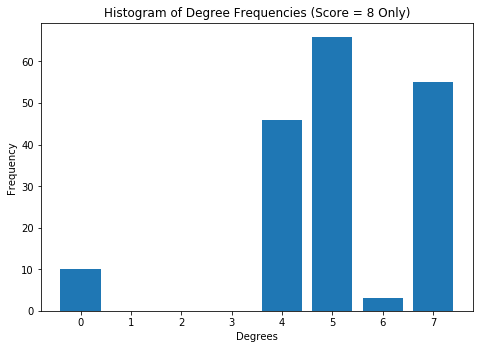

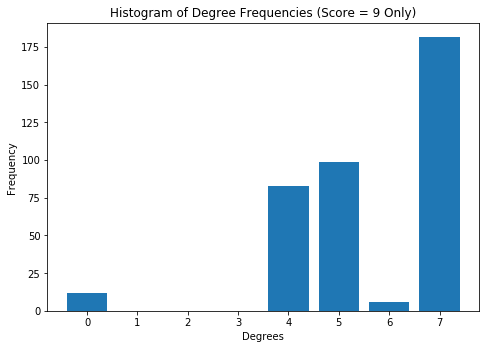

In [17]:
for i, hist in enumerate(part2b_hists):
    plot.bar_graph(hist, range(0, 8), range(0, 8), 'Degrees', 'Frequency', 'Histogram of Degree Frequencies (Score = ' + str(i) + ' Only)' )

# i = 9
# hist = part2b_hists[i]
# plot.bar_graph(hist, range(0, 8), range(0, 8), 'Degrees', 'Frequency', 'Histogram of Degree Frequencies (Score = ' + str(i + 1) + ' Only)' )

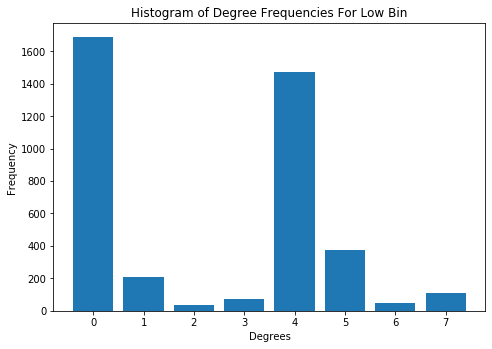

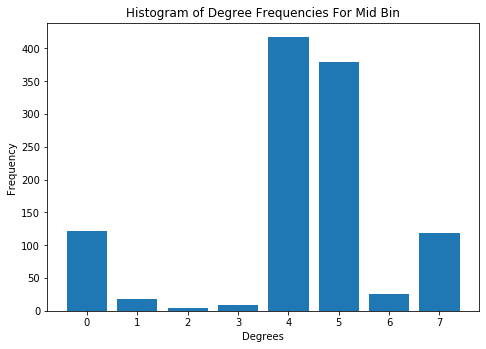

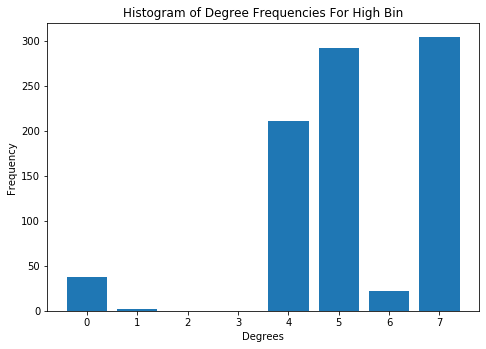

In [18]:
plot.bar_graph(part2c_hists[0], range(0, 8), range(0, 8), 'Degrees', 'Frequency', 'Histogram of Degree Frequencies For Low Bin' )
plot.bar_graph(part2c_hists[1], range(0, 8), range(0, 8), 'Degrees', 'Frequency', 'Histogram of Degree Frequencies For Mid Bin' )
plot.bar_graph(part2c_hists[2], range(0, 8), range(0, 8), 'Degrees', 'Frequency', 'Histogram of Degree Frequencies For High Bin' )